# Collecting metrics from single lines

Leanne Friedrich 7/22/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [7]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [8]:
import pandas as pd

In [11]:
hs = ss[['folder', 'bn', 'horiz_segments']].merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['_auto', '_manual'])
bad_read = hs[(hs.horiz_segments_auto!=hs.horiz_segments_manual)&(hs.horiz_segments_manual>3)]
bad_read

,folder,bn,horiz_segments_auto,horiz_segments_manual
81,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M4S_S_2.50T_210922,NaN,4
285,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_10_VS_40_211005,2.0,33
289,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_2.5_VS_5_211005,NaN,41
293,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_20_VS_40_211005,3.0,27
299,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_5_VS_10_211005,3.0,24
301,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_5_VS_20_211005,NaN,35
306,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_VI_7.5_VS_20_211005,23.0,25
313,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M6_S_3.00_VI_2.5_VS_10_210824,NaN,17
315,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M6_S_3.00_VI_2.5_VS_5_210824,3.0,8
316,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M6_S_3.00_VI_2.5_VS_7.5_210824,1.0,16


# measuring stills

## measure all stills

In [41]:
ftop = os.path.join(cfg.path.server, 'singleLines', r'vels LapRD LapRD 1day\I_3.00_S_3.00')
me.measureStillsRecursive(ftop, diag=0,  overwrite=True, overwriteList=['horiz', 'vert', 'xs'], critHorizLines=2)

INFO: Measuring I_3.00_S_3.00_VI_10_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_horizSummary.csv
INFO: Measuring I_3.00_S_3.00_VI_10_VS_2.5_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_2.5_211109\I_3.00_S_3.00_VI_10_VS_2.5_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/si

Traceback (most recent call last):
  File "..\py\metrics.py", line 466, in measureStillsRecursive
    measureStills(topfolder, overwrite=overwrite, diag=diag, **kwargs)
  File "..\py\metrics.py", line 456, in measureStills
    hm, units = horizMeasure(file[0], progDims,  diag=diag, **kwargs)
  File "..\py\metrics.py", line 362, in horizMeasure
    ret, cmunits, attempt, im2 = horizSegment(im0, attempt0, progDims, diag, s, **kwargs)
  File "..\py\metrics.py", line 341, in horizSegment
    r,cmu = horizLineMeasure(df, y, margin,labeled, im2, diag, s, j, progDims)
  File "..\py\metrics.py", line 297, in horizLineMeasure
    componentMeasures, cmunits = measureComponent(componentMask, True, s, maxlen, reverse=(j==1), diag=max(0,diag-1))
  File "..\py\metrics.py", line 121, in measureComponent
    vleak = sum([np.pi*(r/2)**2 for r in leaks])
UnboundLocalError: local variable 'leaks' referenced before assignment


INFO: Measuring I_3.00_S_3.00_VI_2.5_VS_7.5_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_horizSummary.csv
INFO: Measuring I_3.00_S_3.00_VI_20_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_20_VS_10_211109\I_3.00_S_3.00_VI_20_VS_10_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbo

## measure one folder

In [95]:
file = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_10_210824')
me.measureStills(file, overwrite=True, overwriteList=['vert'])

INFO: Measuring I_2.75_S_2.75_VI_2.5_VS_2.5_210824
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_2.5_210824\I_2.75_S_2.75_VI_2.5_VS_2.5_210824_vertSummary.csv


##### delete all horizontal summaries from 09/22/21

In [102]:
ftop = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT')
for f in os.listdir(ftop):
    for f1 in os.listdir(os.path.join(ftop,f)):
        if '210922' in f1:
            f2 = os.path.join(ftop,f, f1,f1+'_horizSummary.csv')
            if os.path.exists(f2):
                os.remove(f2)

## diagnostics

##### initialize the folder and check if the summaries are good

In [196]:
i = '4.00'
s = '4.00'
folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day',f'I_{i}_S_{s}', f'I_{i}_S_{s}_210727')
# folder = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT', f'I_M{i}S_S_{s}T', f'I_M{i}S_S_{s}T_210922')
# folder = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_10_211109')
me.checkAndDiagnoseRecursive(folder, redo=False)

INFO: Problems detected in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_4.00_S_4.00\I_4.00_S_4.00_210727


,code,description,value,st
0,1,Missing # vert lines,"{1, 2, 4}",vert
1,2,Missing # horiz lines,{1},horiz
2,5,Inconsistent horiz values,[totarea],horiz


##### collect existing summary data into a table

In [34]:
r,_ = me.stillsSummary(folder, '', filename='empty.csv')
display(r[['bn', 'horiz_roughness', 'horiz_segments']])

,bn,horiz_roughness,horiz_segments
0,I_M5_S_3.00_VI_5_VS_20_211005,0.0,33.0


##### initialize the folder from the bad_read list

In [48]:
i = 10
br = bad_read.iloc[i]
folder = br['folder']
br

IndexError: single positional indexer is out-of-bounds

##### preview measurements of just one line, with diagnostics

INFO: Threshold: 150, product: 51679065, black:49440600
INFO: ylocs: [201.4953788240582, 470.0370514699006, 725.6602449683019]


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:728: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


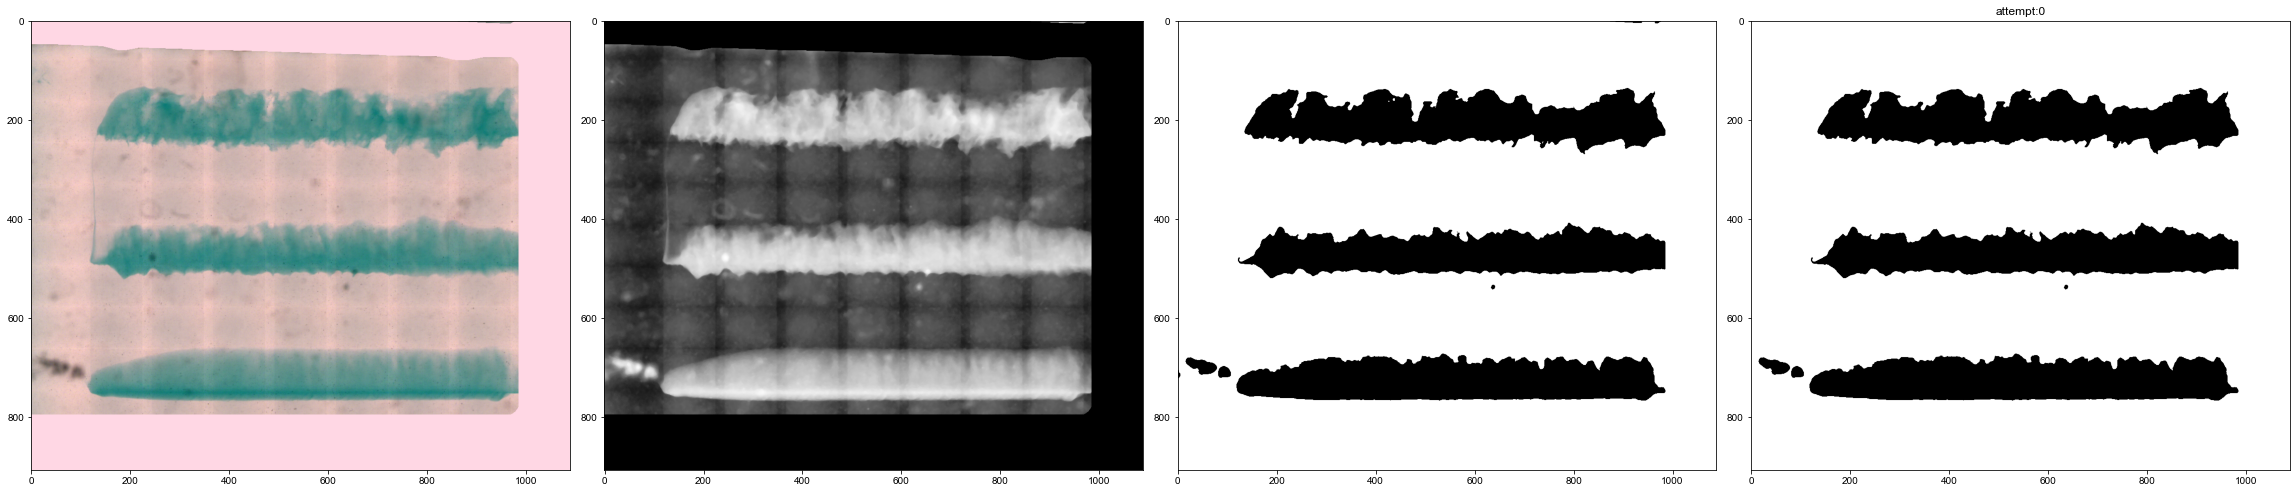

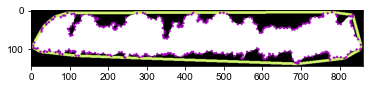

In [478]:
folder = os.path.join(cfg.path.server, 'singleLines', 'vels LapRD LapRD 1day', 'I_3.00_S_3.00', 'I_3.00_S_3.00_VI_20_VS_7.5_211109')
im = me.measure1Line(os.path.join(folder), 'horiz', 0, diag=3, critHorizLines=2)

##### measure all stills for the folder, for stills in the overwrite list

In [3]:
topdir = os.path.join(cfg.path.server, 'singleLines', 'vels mineral LapRD', 'I_M5_S_3.00', 'I_M5_S_3.00_VI_20_VS_40_211005')
folders = [os.path.join(topdir, f) for f in os.listdir(topdir)]

INFO: Measuring I_M6_S_3.00_VI_2.5_VS_7.5_210824
INFO: Threshold: 200, product: 9203205, white:19630320
INFO: Threshold: 200, product: 9153735, white:19630320
INFO: Threshold: 200, product: 9440610, white:19630320
INFO: Threshold: 200, product: 9644100, white:19630320
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_7.5_210824\I_M6_S_3.00_VI_2.5_VS_7.5_210824_vertSummary.csv
INFO: Threshold: 120, product: 2244765, white:80703040
INFO: ylocs: [228.68850698174006, 487.22521419828644, 749.8787234042553]


,line,segments,maxlen,totlen,maxarea,totarea,roughness,meanT,stdevT,minmaxT,vest
0,0,6,133.33,620.00,10344.44,41155.56,0.0,72.00,0.05,0.14,2.43e+06
1,1,6,123.33,563.33,9077.78,36133.33,0.0,73.60,0.05,0.14,2.29e+06
2,2,4,196.67,493.33,15666.67,33833.33,0.0,79.66,0.09,0.29,2.33e+06


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_7.5_210824\I_M6_S_3.00_VI_2.5_VS_7.5_210824_horizSummary.csv


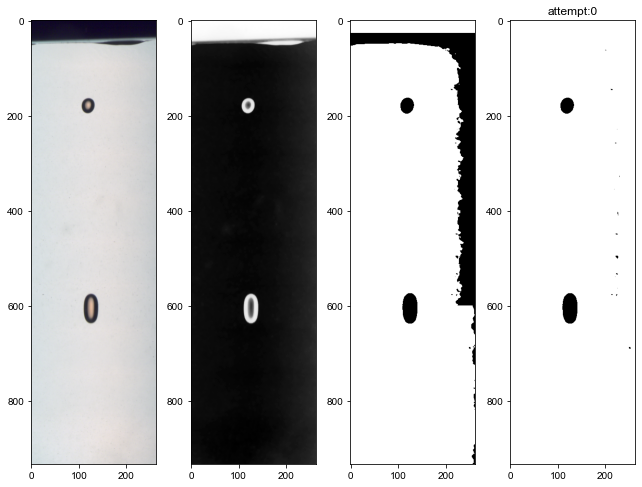

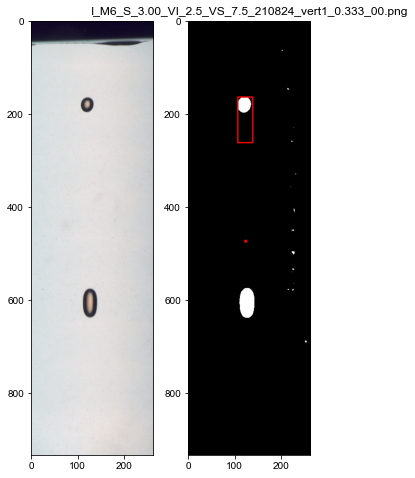

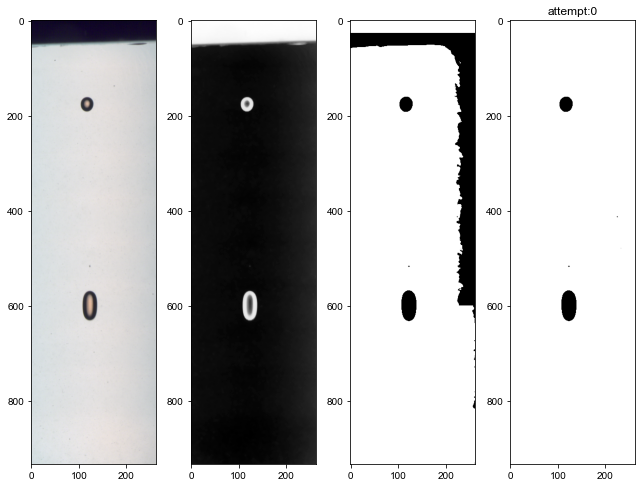

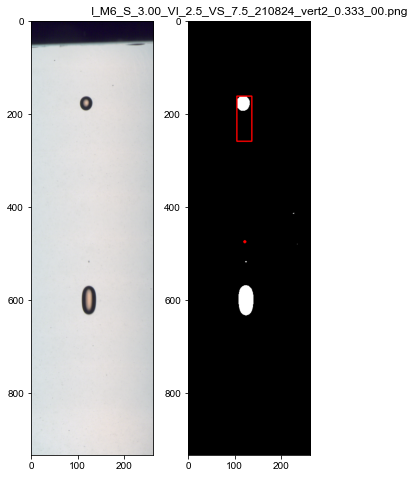

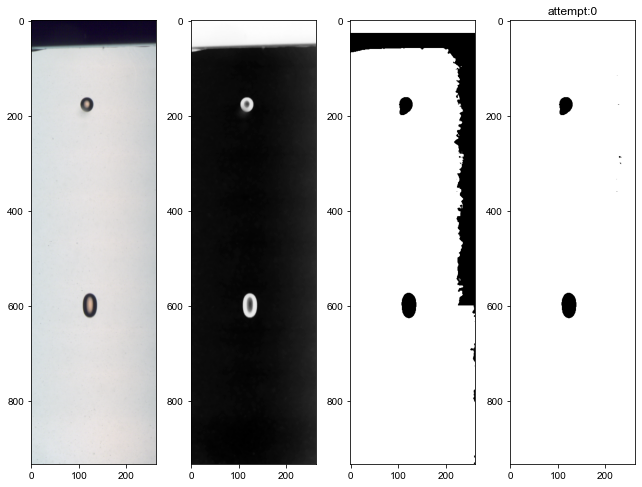

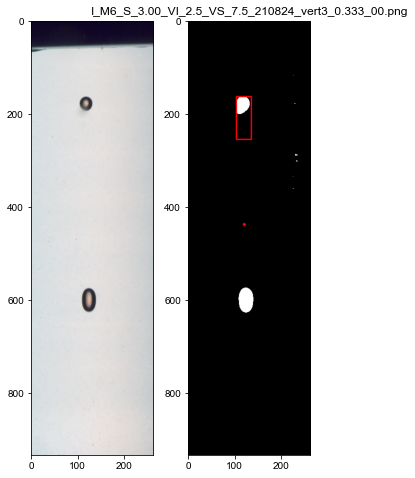

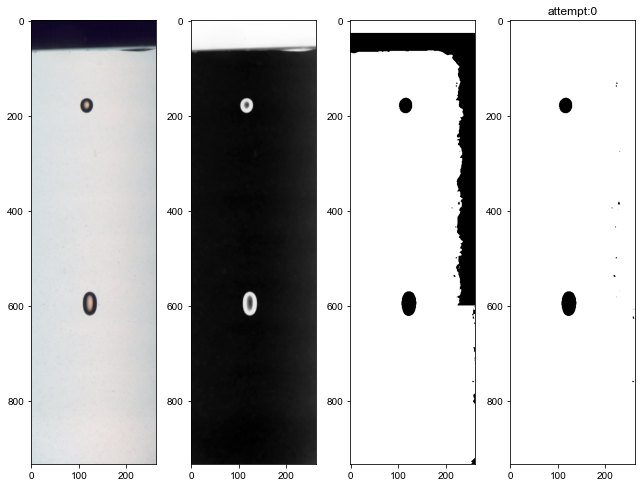

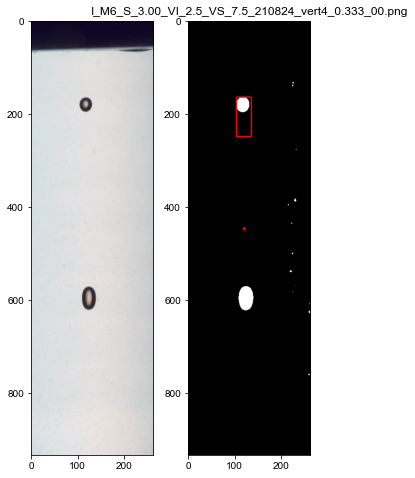

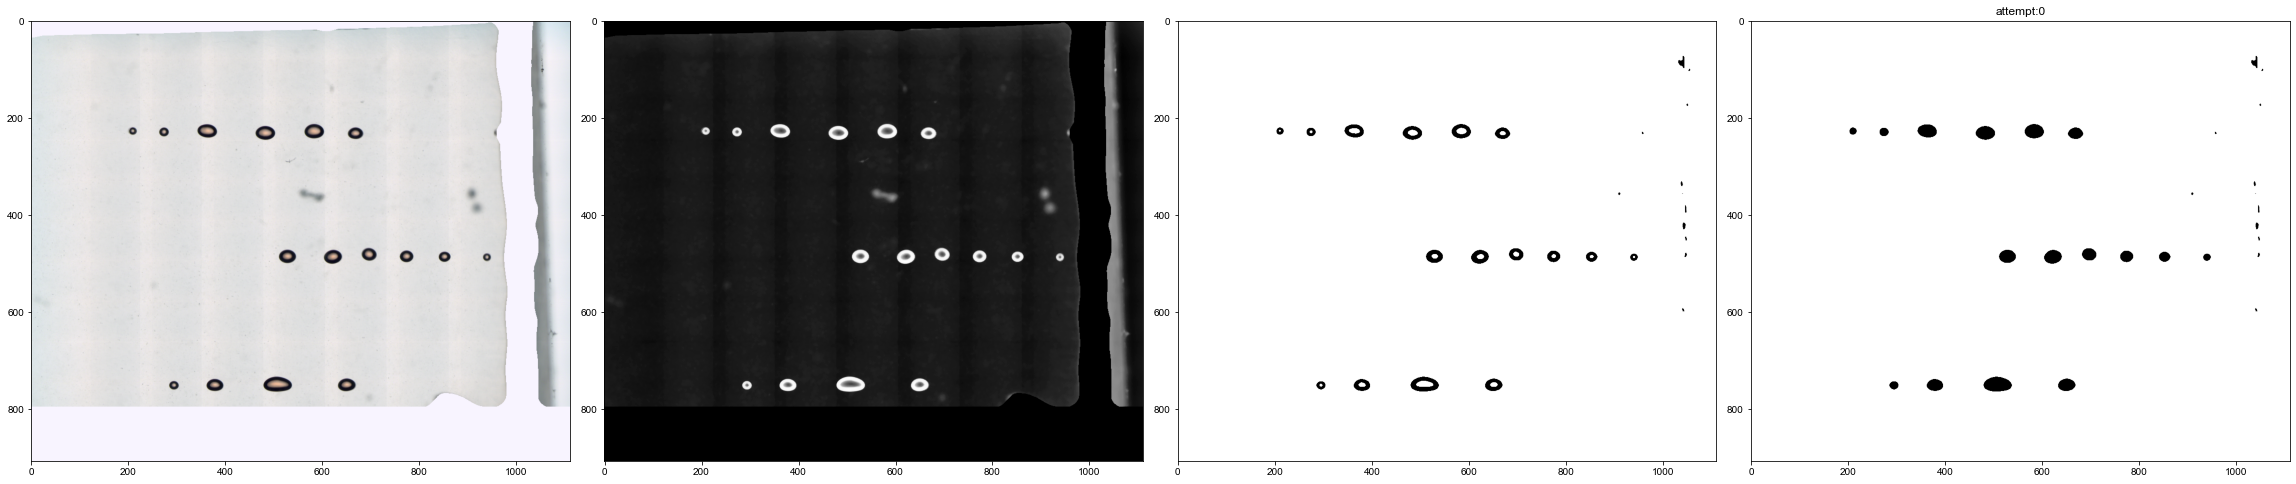

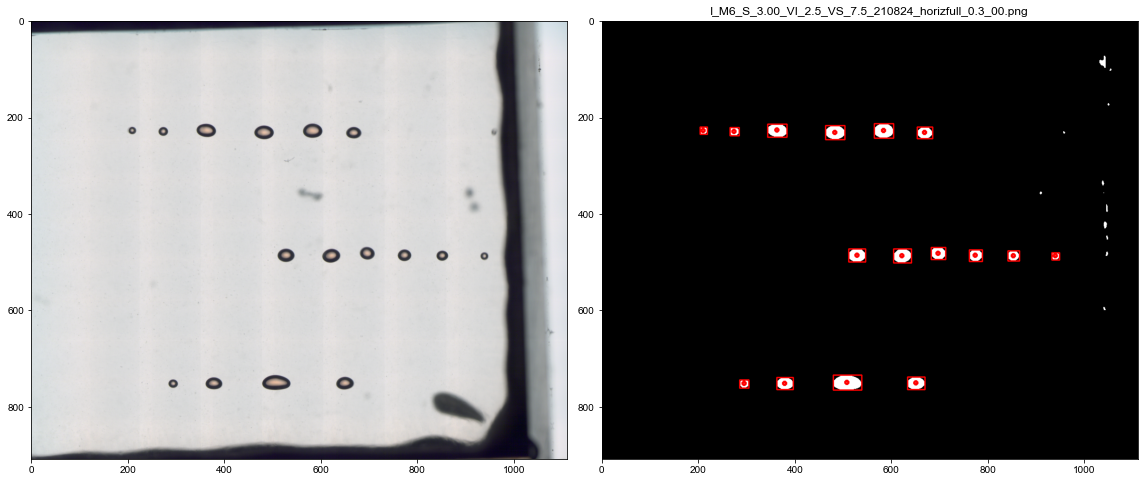

In [47]:
me.measureStills(folder, overwrite=True, overwriteList=['horiz'], diag=2, critHorizLines=2, topthresh=120, acrit=100, satelliteCrit=0.05)

##### make a copy of the stitched image

In [431]:
me.copyImage(folder, 'horiz', 0)

INFO: Created new file //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_40_VS_10_211109\I_3.00_S_3.00_VI_40_VS_10_211109_horizfull_0.3_01.png


##### open the stitched image

In [432]:
me.openImageInPaint(folder, 'horiz', 0)

In [43]:
me.openExplorer(folder)